## Исследование данных о российском кинопрокате



# Цель исследования

Нужно изучить рынок российского кинопроката и выявить текущие тренды. Уделите внимание фильмам, которые получили государственную поддержку. Попробуйте ответить на вопрос, насколько такие фильмы интересны зрителю.

# Источник данных

Мы будем работать с данными, опубликованными на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.

# Задачи исследования

1. Посмотреть сколько фильмов выходило в прокат каждый год. Обратить внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитать какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

2. Изучить как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

3. С помощью сводной таблицы посчитаем среднюю и медианную сумму сборов для каждого года.

3. Определить влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года?

3. Исследовать фильмы, которые получили государственную поддержку.

# Обзор данных

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None #предотвращение появление сообщения SettingWithCopyWarning
pd.pandas.set_option('display.max_columns', None) #отобразим все колонки таблицы
pd.options.display.float_format = '{:,.2f}'.format #округлим числовые значения до сотых, дабы избержать экспоненциального формата данных
plt.rcParams["figure.figsize"] = (12, 6)
plt.rcParams["axes.formatter.limits"] = (-99, 99) #disable scientific notation on axes

In [ ]:
path = '/datasets/'
web_path = '****'
data_1 = 'mkrf_movies.csv'
data_2 = 'mkrf_shows.csv'

try:
    raw_data_movies = pd.read_csv(path + data_1)
    raw_data_shows = pd.read_csv(path + data_2)
except:
    raw_data_movies = pd.read_csv(web_path + data_1)
    raw_data_shows = pd.read_csv(web_path + data_2)

In [ ]:
raw_data_movies.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [ ]:
raw_data_shows.head()

,puNumber,box_office
0,111000113,"2,450.00"
1,111000115,"61,040.00"
2,111000116,"153,030,013.40"
3,111000117,"12,260,956.00"
4,111000118,"163,684,057.79"


In [ ]:
raw_data_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [ ]:
raw_data_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


Объединим данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм, но перед этим приведем данным в порядок.

In [ ]:
raw_data_movies[~raw_data_movies['puNumber'].str.isdigit()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
804,Паранормальный Якутск,111004112,2012-08-24T12:00:00.000Z,Художественный,ИП Тимофеев К.П.,Россия,К.Тимофеев,NaN,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


Данные строки `puNumber` имеют разные типы данных, их можно привести к типу `int`, но правильнее всего привести их к типу `float`, чтобы заменить отличные от чисел значения на `NaN`, т.к. по строке `804` отсутсвуют данные в категории `box_office`.

In [ ]:
def convert_to_int(val):
    if val.isdigit():
        return int(val)
    return float('nan')

In [ ]:
raw_data_movies['puNumber'] = raw_data_movies['puNumber'].apply(convert_to_int)

In [ ]:
raw_data_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7484 non-null   float64
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

Далее нам необходимо объединить обе таблицы в один датафрейм. Объединять будем по колонке `puNumber` с помощью метода `merge`, т.к. он является наиболее оптимальным по сравнению с `join`.

In [ ]:
raw_data_movies = raw_data_movies.merge(raw_data_shows, on='puNumber', how='left')

In [ ]:
raw_data_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7484 non-null   float64
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

Количество строк стало `7486`, что совпадает с количеством до объединения. Следовательно, объединение прошло без потери данных.

## Вывод

Были выявлены проблемы с типом данных в стобце `puNumber`. Данную проблему мы решили, создав функцию, которая поспособствовала объединению таблиц в один датафрейм с помощью метода `merge`.

# Предобработка данных

In [ ]:
data_movies = raw_data_movies.copy()
data_shows = raw_data_shows.copy()

## Преобразование типов данных

Проверим типы данных в датафрейме и преобразуем их там, где это необходимо.

In [ ]:
data_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7484 non-null   float64
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

`show_start_date` — дата премьеры фильма, нужно привести к типу `dateline`  
`ratings ` — рейтинг фильма на КиноПоиске, нужно привести к типу `flost`

In [ ]:
data_movies['show_start_date'] = pd.to_datetime(data_movies['show_start_date'], format='%Y-%m-%dT%H:%M:%S.%fZ')

Столбец `ratings`, нельзя перевести методом `to_numeric`, т.к. имеются строки, имеющие рейтинг в виде %.

In [ ]:
data_movies[data_movies['ratings'].str.contains('%').fillna(False)]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
259,Прошлое,"221,030,715.00",2015-07-29 12:00:00,Художественный,"20 Сенчюри Фокс де Архентина, Чемо, ЭйчБи Филм...",Аргентина - Бразилия,Эктор Бабенко,"Эктор Бабенко, Оскар Крамер, Хуго Сидмэн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,99%,"ужасы,триллер,драма",NaN
811,От винта!,"114,000,212.00",2012-08-06 12:00:00,Анимационный,"ЗАО ""Продюсерский центр ""Парадиз""",Россия,О.Лопато,"Г.Нерсисян, А.Манасарян, А.Нерсесян",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,28%,"детский,приключения,комедия","1,740.00"
1053,Песочный человек,"121,029,212.00",2012-11-29 12:00:00,Художественный,Спотлайт Медиа Продакшн,Швейцария,Питер Луизи,"Дэвид Луизи, Питер Луизи",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,97%,"ужасы,фантастика,фэнтези",NaN
1341,Сказка о добре и Вре,"111,008,913.00",2013-11-15 12:00:00,Художественный,"НП ""Студия игрового кино ""Лик""",Россия,Е.Шиляева,К.Терещенко,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,99%,"триллер,драма,детектив",NaN
1805,Спираль.,"111,001,014.00",2014-01-30 12:00:00,Художественный,"ООО ""Компания Питон""",Россия,А.Волгин,Е.Ковалева,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,99%,"аниме,мультфильм,ужасы","4,295.00"
1874,Короткие истории о любви 2,"121,002,615.00",2015-02-13 12:00:00,Художественный,"Кавиар, Курт 13, СтритЛайт Филмз, Нэйер Дойче ...",Нидерланды - США - Германия - Канада - Франция...,"Мэтью Аувро, Лео Брайдл, Бен Бренд, Ден Кларк,...","Мэри Пэт Бентел, Бен Бренд, Сиара Гиллан, Джор...",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,83%,NaN,"1,429,859.00"
1899,Золушка /По сказке Шарля Перро/. Холодное торж...,"121,003,615.00",2015-02-27 12:00:00,Художественный,"Женр Филмз, Уолт Дисней Пикчерз",США,Кеннет Брана,"Дэвид Бэррон, Саймон Кинберг, Эллисон Ширмур",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,64%,"мюзикл,фэнтези,мелодрама","528,732,557.70"
2126,Поездка к матери,"111,002,015.00",2015-03-02 12:00:00,Художественный,"ЗАО ""Киностудия ""М""-Фильм""",Россия,М.Косырев-Нестеров,М.Косырев-Нестеров,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,91%,"драма,семейный",0.00
2146,Главный,"111,003,415.00",2015-03-27 12:00:00,Художественный,"ООО ""Киностудия ""МАСТЕР""",Россия,Ю.Кара,Ю.Кара,«6+» - для детей старше 6 лет,0.00,"10,000,000.00","40,000,000.00",Министерство культуры,94%,"фантастика,боевик,комедия","334,750.00"
2438,Самый рыжий Лис,"111,012,715.00",2015-07-30 12:00:00,Художественный,"ООО ""Продюсерский центр ""Ленфильм""",Россия,А.Стреляная,"А.Котелевский, Э.Пичугин",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,62%,"фэнтези,семейный",NaN


In [ ]:
print('Количество строк, имеющих рейтинг в %:', len(data_movies[data_movies['ratings'].str.contains('%').fillna(False)]))

Количество строк, имеющих рейтинг в %: 29


Можно было бы привести их дробному виду, добавив точку, но это неуместно делать, т.к. у нас формируется рейтинг по десятибальной шкале, а рейтинг в виде % скорее всего был рассчитан в виде: "Нравится" и "Не нравится", поэтому просто удалим их.

In [ ]:
data_movies = data_movies[~data_movies['ratings'].str.contains('%').fillna(False)]
data_movies['ratings'] = pd.to_numeric(data_movies['ratings'])

## Обработка пропущенных значений

В данных присутсвует достаточно много пропусков среди категориальных переменных. Создадим таблицу с указанием доли пропусков по каждой колонке, чтобы сэкономить наше время и потом удалить пропуски или оставить их без изменений, где доля составляет не более 1%.

In [ ]:
pd.concat([data_movies.isna().sum(), data_movies.isna().mean()],
          axis=1, keys=['sum', 'conversation']).style.format({'conversation': '{:.2%}'}).background_gradient('coolwarm')

,sum,conversation
title,0,0.00%
puNumber,2,0.03%
show_start_date,0,0.00%
type,0,0.00%
film_studio,18,0.24%
production_country,2,0.03%
director,9,0.12%
producer,568,7.62%
age_restriction,0,0.00%
refundable_support,7127,95.57%


Больше всего пропусков присутсвует в столбцах, связанных с финансированием проектов, они практически полностью не заполнены.
Однако, релевантные данные для заполнения пропусков отсутствуют, поэтому оставим их как есть.  

Проверим, для какого количества фильмов с господдержкой остуствуют данные по сборам:

In [ ]:
data_movies[data_movies['budget'].notna()]['box_office'].isna().sum()

14

Отлично, пропуски данных для фильмов, имеющих поддержку от государства практически отсутсвуют.

## Обработка дубликатов

In [ ]:
print(f"Количество явных дубликатов: {data_movies.duplicated().sum()}. \
Доля: {data_movies.duplicated().sum()/data_movies.shape[0]:.3%}.")

Количество явных дубликатов: 0. Доля: 0.000%.


Явные дубликаты в датафрейме отсутсвуют.

In [ ]:
data_movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7457 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7457 non-null   object        
 1   puNumber               7455 non-null   float64       
 2   show_start_date        7457 non-null   datetime64[ns]
 3   type                   7457 non-null   object        
 4   film_studio            7439 non-null   object        
 5   production_country     7455 non-null   object        
 6   director               7448 non-null   object        
 7   producer               6889 non-null   object        
 8   age_restriction        7457 non-null   object        
 9   refundable_support     330 non-null    float64       
 10  nonrefundable_support  330 non-null    float64       
 11  budget                 330 non-null    float64       
 12  financing_source       330 non-null    object        
 13  ratings 

In [ ]:
data_movies.nunique()

title                    6743
puNumber                 7453
show_start_date          1961
type                        8
film_studio              5469
production_country        946
director                 4793
producer                 5328
age_restriction             5
refundable_support         34
nonrefundable_support      74
budget                    289
financing_source            3
ratings                    80
genres                    739
box_office               2924
dtype: int64

Если обратить внимание на `title`, то можно предположить, что скорее всего какие-то ленты повторно выходили в прокат, получая новое прокатное удостоверение, т.к. число  кинолент уменьшилось на `714` - с `7457` до `6743`.

In [ ]:
data_movies.puNumber.value_counts()

puNumber
221,054,410.00    2
221,154,310.00    2
221,048,915.00    1
121,004,611.00    1
121,014,411.00    1
                 ..
121,008,715.00    1
121,008,915.00    1
121,009,015.00    1
111,004,115.00    1
124,010,719.00    1
Name: count, Length: 7453, dtype: int64

In [ ]:
data_movies.query('puNumber == [221154310, 221054410]')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4638,Как жениться и остаться холостым,"221,154,310.00",2010-12-17 12:00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.00,"мелодрама,комедия",NaN
4639,Иоанна - женщина на папском престоле /По роман...,"221,154,310.00",2010-12-17 12:00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.60,"драма,мелодрама,история",NaN
5067,Анализируй это!,"221,054,410.00",2010-05-25 12:00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.40,"комедия,криминал",NaN
5068,Анализируй то!,"221,054,410.00",2010-05-25 12:00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.80,"комедия,криминал",NaN


In [ ]:
data_movies.title.value_counts().head(10)

title
День святого Валентина_                             5
Робин Гуд (Robin Hood)                              4
Лузеры                                              4
Начало_                                             4
Рапунцель: Запутанная история                       4
Красавчик-2                                         4
Прощание                                            4
Не брать живым /По книге Раджива Чандрасекарана/    4
Дитя тьмы                                           4
Кошки против собак: Месть Китти Галор               4
Name: count, dtype: int64

In [ ]:
data_movies[data_movies['title'].duplicated()].shape[0]

714

Наши предположения подтвердились, действительно, `714` кинолент выходило в повторный прокат. Можно было бы объединить сборы `box_office`, но т.к. данные по конкретным фильмам нам не понадобятся, то можно этого не делать.

## Проверка категориальных значений

In [ ]:
data_movies.production_country.value_counts().tail(20)

production_country
Франция - Бельгия - Канада                                                1
Греция - Россия                                                           1
Великобритания - Исландия - Испания - Швейцария - США                     1
Австралия - Великобритания - Бельгия - Индия                              1
Швеция - Германия - Франция - Норвегия                                    1
Нидерланды - Бельгия - Германия - Ирландия                                1
Нидерланды - Великобритания - Бельгия                                     1
США - Колумбия - Испания                                                  1
Франция-Испания-Бельгия-Панама                                            1
США-Великобритания-Чехия-Румыния                                          1
Аргентина - Уругвай - Россия - Германия - Франция - Нидерланды            1
Швеция - Франция - Норвегия - Дания                                       1
Италия-Франция-Великобритания                                        

In [ ]:
data_movies.director.value_counts()

director
О.Семёнова              47
Стивен Содерберг        17
Ридли Скотт             16
Д.Червяцов              16
Тиль Швайгер            14
                        ..
Флориан Галленбергер     1
Афонсо Пойарт            1
Том Коркоран             1
Е.Сергеев                1
И.Трусов                 1
Name: count, Length: 4793, dtype: int64

In [ ]:
data_movies.producer.value_counts()

producer
П.Смирнов                                        67
Олег Кузовков, Дмитрий Ловейко, Марина Ратина    28
С.Сельянов                                       18
Д.Ловейко, О.Кузовков                            16
А.Тельнов                                        11
                                                 ..
Филипп Логи, Ксавье Риго, Марк-Антуан Роберт      1
Б.Гуц, А.Гусенцова                                1
Лоран Петен, Мишель Петен                         1
 ООО "КиноФирма"                                  1
Дженнифер Додж                                    1
Name: count, Length: 5328, dtype: int64

In [ ]:
data_movies.genres.value_counts().tail(20)

genres
комедия,семейный,музыка              1
мюзикл,комедия,мелодрама             1
фантастика,мультфильм,драма          1
драма,фантастика,ужасы               1
документальный,боевик,приключения    1
мелодрама,комедия,триллер            1
мультфильм,детский,комедия           1
приключения,триллер,биография        1
приключения,детский,комедия          1
комедия,криминал,биография           1
боевик,драма,вестерн                 1
детектив,триллер,ужасы               1
вестерн,драма,триллер                1
мюзикл,фэнтези,семейный              1
документальный,новости,драма         1
семейный,детектив,детский            1
комедия,история,драма                1
для взрослых,драма,комедия           1
мюзикл,мелодрама,фэнтези             1
мелодрама,история,драма              1
Name: count, dtype: int64

В столбцах страна-производитель `production_country` и жанр фильма `genres` имеется примерно схожая проблема, в категорию объединены несколько стран или жанров.  

Столбцы режиссёр `director` и продюсер `producer` также имеют одинаковую проблему, в категориях наблюдается разное написание людей:инициалы указаны полностью, либо сокращены.  

В связи с тем, что мы не будем анализировать данные колонки в нашем исследовании, то можно оставить их без изменений. Данная проблема могла возникнуть из-за человечского фактора при сборе данных. В качестве решения стоило бы провести инструктаж по заполнению данных в эти категории, либо написать алгоритм в виде нескольких функций, который бы расклеивал эти строки и извлекал из них нужные значения.

In [ ]:
data_movies.type.value_counts()

type
Художественный                4504
 Художественный               1383
Анимационный                   826
Прочие                         404
Документальный                 285
Научно-популярный               53
 Анимационный                    1
Музыкально-развлекательный       1
Name: count, dtype: int64

В колонке с жанром `type` присутсвуют строки, где при вводе данных была допущена ошибка в виде пробела в начале, скорее всего это произошло из-за человческого фактора.  
Данную проблему можно исправить с помощью метода `.str.strip`, которые удаляет лишние пробелы в начале и конце строки.

In [ ]:
data_movies['type'] = data_movies['type'].str.strip()
data_movies.type.value_counts()

type
Художественный                5887
Анимационный                   827
Прочие                         404
Документальный                 285
Научно-популярный               53
Музыкально-развлекательный       1
Name: count, dtype: int64

## Проверка количественные значения

Изучим столбцы с количественными переменными с помощью функции `describe`.

In [ ]:
data_movies.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
puNumber,"7,455.00","135,249,783.53","1,811,096.00","113,000,164.50","121,015,518.00","124,003,316.50","231,001,111.00","38,385,947.57"
show_start_date,7457,2015-02-19 08:33:22.521121280,2010-01-11 12:00:00,2012-07-02 12:00:00,2015-03-03 12:00:00,2017-11-30 12:00:00,2019-12-30 12:00:00,NaN
refundable_support,330.00,"11,936,363.64",0.00,0.00,0.00,"15,000,000.00","180,000,000.00","24,974,945.34"
nonrefundable_support,330.00,"49,233,297.92",0.00,"25,000,000.00","30,000,000.00","41,125,000.00","400,000,000.00","60,073,639.80"
budget,330.00,"127,835,768.11",0.00,"42,404,381.75","69,118,977.00","145,905,958.50","2,305,074,303.00","188,996,337.04"
ratings,"6,490.00",6.48,1.00,5.90,6.60,7.20,9.20,1.10
box_office,"3,143.00","76,671,582.27",0.00,"87,802.50","2,351,960.00","24,138,966.22","3,073,568,690.79","240,738,045.10"


Если государственная поддержка может отсутсвовать и равняться `0`, то общий бюджет фильма `budget` точно не может быть нулевым.  
Ознакомимся с проблемными данными более детально.

In [ ]:
print('Количество фильмов с нулевым бюджетом:', len(data_movies.query('budget == 0')))

Количество фильмов с нулевым бюджетом: 17


In [ ]:
data_movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7457 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7457 non-null   object        
 1   puNumber               7455 non-null   float64       
 2   show_start_date        7457 non-null   datetime64[ns]
 3   type                   7457 non-null   object        
 4   film_studio            7439 non-null   object        
 5   production_country     7455 non-null   object        
 6   director               7448 non-null   object        
 7   producer               6889 non-null   object        
 8   age_restriction        7457 non-null   object        
 9   refundable_support     330 non-null    float64       
 10  nonrefundable_support  330 non-null    float64       
 11  budget                 330 non-null    float64       
 12  financing_source       330 non-null    object        
 13  ratings 

In [ ]:
data_movies.query('budget == 0')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2053,14+,"111,023,614.00",2014-12-19 12:00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.00,"23,000,000.00",0.00,"Министерство культуры, Фонд кино",6.60,мелодрама,"10,234,016.10"
2058,Дуxless 2,"111,000,415.00",2015-01-26 12:00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,"75,000,000.00",0.00,Фонд кино,6.60,драма,"446,163,511.00"
2472,Воин (2015),"111,017,315.00",2015-09-28 12:00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,"10,000,000.00","70,000,000.00",0.00,Фонд кино,7.80,"боевик,драма,криминал","196,572,438.40"
2532,Бармен.,"111,009,615.00",2015-05-26 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,"20,000,000.00",0.00,0.00,Фонд кино,6.20,"комедия,фэнтези","67,418,974.80"
2615,Савва. Сердце воина,"114,001,715.00",2015-07-21 12:00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,"60,000,000.00","100,000,000.00",0.00,Фонд кино,4.60,"мультфильм,приключения,фэнтези","184,487,551.40"
2684,Тряпичный союз,"111,010,215.00",2015-06-08 12:00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.00,"59,000,000.00",0.00,Фонд кино,6.30,"комедия,драма","1,957,738.51"
2788,Срочно выйду замуж,"111,017,115.00",2015-09-30 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,"35,000,000.00",0.00,Фонд кино,5.10,"комедия,мелодрама","72,937,783.20"
2874,Помню - не помню!,"111,004,916.00",2016-03-01 12:00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.00,"6,000,000.00",0.00,Министерство культуры,4.30,комедия,"15,362,931.43"
3047,Любовь с ограничениями,"111,008,216.00",2016-04-29 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,"19,000,000.00","51,000,000.00",0.00,Фонд кино,6.30,"комедия,мелодрама","70,299,052.00"
3565,Притяжение (2016),"111,018,116.00",2016-12-16 12:00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.00,"250,000,000.00",0.00,Фонд кино,5.60,фантастика,"1,038,321,489.00"


Можно было бы заполнить бюджет `budget` проусуммировав `refundable_support` и `nonrefundable_support`, но по правилам осуществления займов общий процент поддержки не может составлять 100% от бюджета фильма, поэтому подобную аномалию исправить таким способом нельзя.

В связи с тем, что подобная аномалия наблюдается лишь в `17` фильмах, то мы можем попробовать найти информацию о бюджете из открытых источников, например, с Кинопоиска.

In [ ]:
data_movies.at[2058, 'budget'] = 140000000
data_movies.at[2472, 'budget'] = 115000000
data_movies.at[2532, 'budget'] = 60000000
data_movies.at[2615, 'budget'] = 1000000000
data_movies.at[2788, 'budget'] = 102200000
data_movies.at[2874, 'budget'] = 94900000
data_movies.at[3047, 'budget'] = 110000000
data_movies.at[3565, 'budget'] = 380000000
data_movies.at[3675, 'budget'] = 138240000
data_movies.at[3739, 'budget'] = 70000000
data_movies.at[5673, 'budget'] = 115000000
data_movies.at[5806, 'budget'] = 110000000
data_movies.at[6008, 'budget'] = 116000000
data_movies.at[6323, 'budget'] = 220000000
data_movies.at[6823, 'budget'] = 290000000

In [ ]:
data_movies.query('budget == 0')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2053,14+,"111,023,614.00",2014-12-19 12:00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.00,"23,000,000.00",0.00,"Министерство культуры, Фонд кино",6.60,мелодрама,"10,234,016.10"
2684,Тряпичный союз,"111,010,215.00",2015-06-08 12:00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.00,"59,000,000.00",0.00,Фонд кино,6.30,"комедия,драма","1,957,738.51"


Увы, но не все фильмы раскрывают информацию о бюджете, либо он указан в американских долларах `USD`, поэтому приравняем бюджет `budget` таких фильмов к `NaN` чтобы не учитывать такие данные в исследовании.

In [ ]:
data_movies['budget'] = data_movies['budget'].where(data_movies['budget'] != 0, float('nan'))

## Добавление новых столбцов





Создадим столбец с информацией о годе проката. Выделим год из даты премьеры фильма.

In [ ]:
data_movies['year'] = data_movies['show_start_date'].dt.year

Создадим два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

Для начала создадим функцию, которую можно было бы применить к двум столбцам сразу.

In [ ]:
def add_main(data_movies, columns):
    for column in columns:
        data_movies[f'main_{column}'] = data_movies[column].dropna().apply(lambda x: x.split(', ')[0])
    return data_movies

Теперь применим ее:

In [ ]:
data_movies = add_main(data_movies, ['director', 'genres'])

- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [ ]:
data_movies['government_support'] = round((data_movies['refundable_support'] + data_movies['nonrefundable_support']) / data_movies['budget'] * 100, 2)

## Вывод

Столбцы с названием студии `film_studio`, режиссёром `director` и продюсером `producer` можно дополнить вручную выполнив поиск, но т.к. эти данные не фигурируют в рамках нашего исследования, то можно оставить все без изменений.

Столбцы `refundable_support`, `nonrefundable_support`, `budget` и `financing_source` присутствуют только для тех фильмов на которые было выделено финансирование по линии Министерства культуры или Фонда кино, заполнять их ненужно.

Столбцы `ratings` и `genres` около `8%`, а `box_office` - почти `58%` пропусков, но эта информация уникальна и не может быть восстановлена с помощью какого-либо метода через остальные данные, т.к. фактическая информация исказится. Сканирование дополнительных таблиц на сайте mkrf.ru не принесло результата. Если данных нет в нашей исходной таблице, то это лишь может означать, что их нет и на сайте Министерства культуры.

Мы убрали ведущие и хвостовые пробелы из названий типов фильмов, убрав такие образом дублирующие категории.

Заполнили данные по общему бюджету для кинолент с государственной подедржкой, там где это возможно, от остальных строк с нулевым бюджетом избавились, заменив их на `NaN` (таких строк оказалось лишь `2`).

Добавили новые столбцы: год проката `year`, фамилию главного режиссера `main_director`, основной жанр киноленты `main_genre`.

Рассчитали долю от общего бюджета фильма составляет государственная поддержка

# Фильмы получившие государственную поддержку

Создадим столбец `total_support`, который отражает сумму: объёма возвратных средств государственной поддержки `refundable_support` и объёма невозвратных средств государственной поддержки `nonrefundable_support`.

In [ ]:
data_movies['total_support'] = data_movies['refundable_support'] + data_movies['nonrefundable_support']

Также создадим отдельный датафрейм `supported_movies` для фильмов, имеющих государственную поддержку, чтобы легче было оперировать с данными:

In [ ]:
supported_movies = data_movies.query('2015 <= year <= 2019 & total_support > 0')

In [ ]:
supported_movies_pivot = supported_movies.pivot_table(
    index='year', values=['total_support'],
    aggfunc=['count', 'sum'])
supported_movies_pivot

,count,sum
,total_support,total_support
year,,
2015,84,"3,641,541,459.00"
2016,61,"4,303,155,482.00"
2017,41,"3,183,971,662.00"
2018,56,"3,446,969,465.00"
2019,70,"4,904,000,000.00"


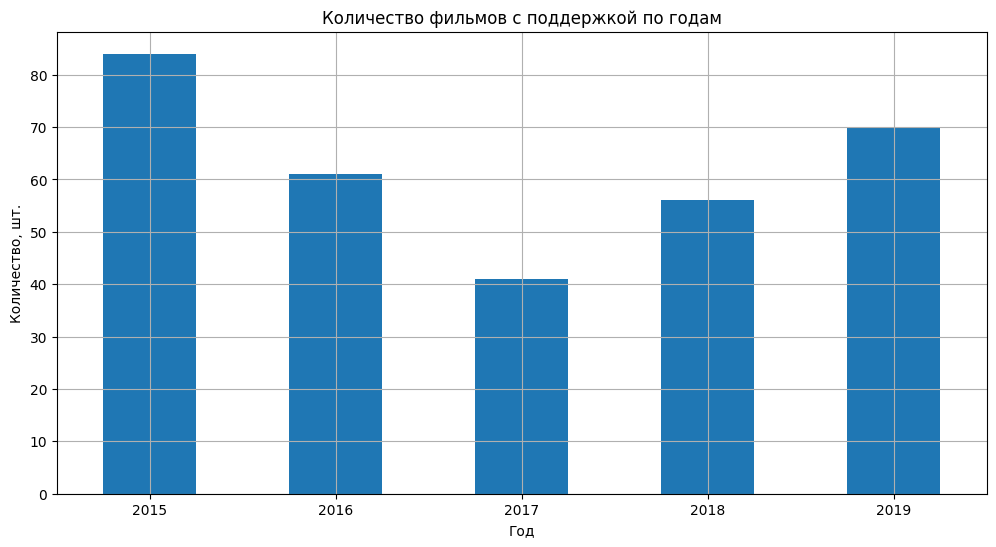

In [ ]:
supported_movies_pivot.plot(title='Количество фильмов с поддержкой по годам', y='count', xlabel='Год', ylabel='Количество, шт.', kind='bar', legend=False, grid=True)
plt.xticks(rotation=360);

Наибольшее количенство фильмов получило финансирование в `2015` году, их насчитывается `84`, в 2016-2017-х годах их количество уменьшилось. Скорее всего это может быть связано с новыми критериями отбора для финансирования, т.к. в последние годы стало выделяться больше денег.

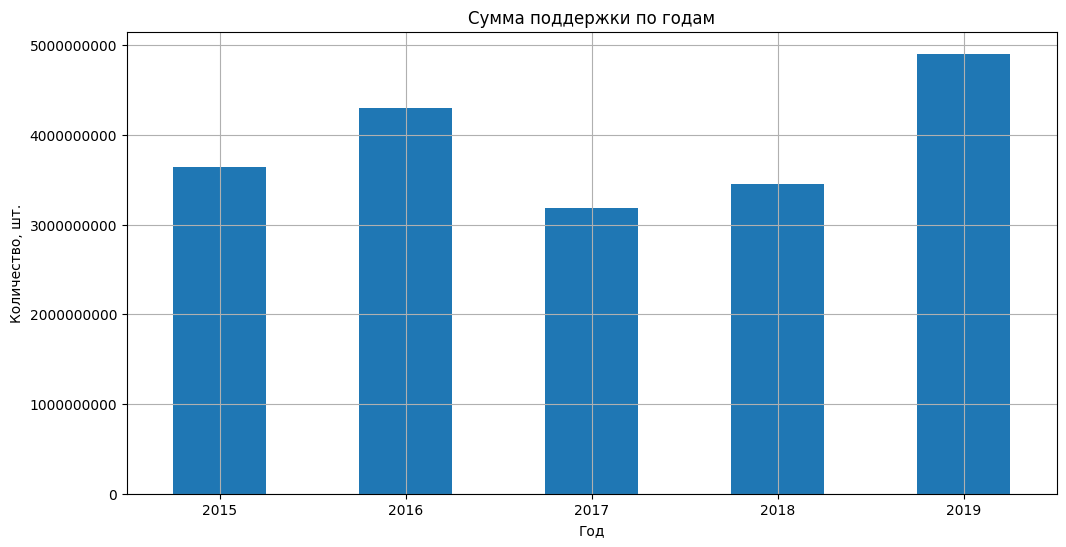

In [ ]:
supported_movies_pivot.plot(title='Сумма поддержки по годам', y='sum', xlabel='Год', ylabel='Количество, шт.', kind='bar', legend=False, grid=True)
plt.xticks(rotation=360);

В целом наблюдается тренд на рост финансирования. На `2019` год приходится пик финансирования `4.9` млрд. рублей.

In [ ]:
supported_movies.pivot_table(
    index=['age_restriction'], values=['total_support', 'government_support', 'nonrefundable_support'],
    aggfunc={'government_support':['count', 'mean', 'median', 'min', 'max'], 'nonrefundable_support':'sum', 'total_support':'sum'})

government_support                     \
                                                    count   max  mean median   
age_restriction                                                                
«0+» - для любой зрительской аудитории                  6 68.99 44.59  53.06   
«12+» - для детей старше 12 лет                       100 70.00 51.54  60.55   
«16+» - для детей старше 16 лет                       117 78.47 54.04  62.50   
«18+» - запрещено для детей                            25 69.91 51.88  55.46   
«6+» - для детей старше 6 лет                          63 70.00 48.70  53.74   

                                             nonrefundable_support  \
                                         min                   sum   
age_restriction                                                      
«0+» - для любой зрительской аудитории  9.09        183,520,000.00   
«12+» - для детей старше 12 лет         4.40      5,968,543,921.00   
«16+» - для детей старше 16 лет         7.69      4,549,200,200.00   
«18+» - запрещено для детей            23.33        863,000,000.00   
«6+» - для детей старше 6 лет          10.02      4,047,373,947.00   

                                          total_support  
                                                    sum  
age_restriction                                          
«0+» - для любой зрительской аудитории   183,520,000.00  
«12+» - для детей старше 12 лет        7,536,043,921.00  
«16+» - для детей старше 16 лет        5,384,353,319.00  
«18+» - запрещено для детей              895,346,881.00  
«6+» - для детей старше 6 лет          5,480,373,947.00

Медианные и средние значения в долевом соотшении примерно на одном и том же уровне, тоже самое и с минимальными/максимальными значениями. Разве что больше всего средств было выделено за данный период на категорию `12+` - `7,5` млрд. рублей.

Посмотрим как обстоят дела с окупаемостью российского кинематоргафа, поддерживаемого государством.

In [ ]:
profit_s = supported_movies[(supported_movies['budget'].notna()) & (supported_movies['budget'] > 0) & (supported_movies['box_office'].notna())]

def profit(row):
    return ((row['box_office'].sum() - row['budget'].sum()) / row['budget'].sum())

pd.DataFrame(profit_s.groupby('year').apply(profit).reset_index().rename(columns={0:'profit'}))

,year,profit
0,2015,-0.33
1,2016,-0.22
2,2017,0.54
3,2018,0.38
4,2019,-0.26


Самым удачным годом является `2017`, а также `2018`, в другие года денежные вливания не окупили себя.

In [ ]:
supported_movies.pivot_table(
    index=['type'], values=['total_support', 'government_support', 'nonrefundable_support'],
    aggfunc={'government_support':['count', 'mean', 'median', 'min', 'max'], 'nonrefundable_support':'sum', 'total_support':'sum'})

government_support                           \
                            count   max  mean median   min   
type                                                         
Анимационный                   30 68.97 41.69  35.95 10.02   
Документальный                  1  9.09  9.09   9.09  9.09   
Художественный                280 78.47 53.03  61.56  4.40   

               nonrefundable_support     total_support  
                                 sum               sum  
type                                                    
Анимационный        1,600,489,465.00  2,500,489,465.00  
Документальный          3,000,000.00      3,000,000.00  
Художественный     14,008,148,603.00 16,976,148,603.00

Финансирование в основном приходится на художественные фильмы.

# Результаты исследования

В данном исследовании мы изучили рынок российского кинопроката и выявили текущие тренды. Рассмотрели фильмы, которые получили государственную поддержку.

Перед тем как приступить к исследованию мы провели:
1. Предварительную обработку полученного архива данных - обработали пропущенные значения там, где это необходимо, заменили типы данных на необходимые для удобной работы.
2. Были определены и устранены аномальные значения в данных, а также изменили типы данных.
3. Объединенили необходимую для исследования информацию. Добавили производные данные.
4. Провели исследовательский анализ данных и исследовали сколько фильмов выходило каждый год. Посмотрели на динамику проката. Определили влияние возрастных ограничений киноленты на сборы фильма в прокате.

В ходе исследования были выявлены следующие факторы:
1. Больше всего фильмов вышло в прокат в 2019 году, а меньше в 2010.
2. Больше всего сборов было в 2018, а меньше в 2010.
3. Возрастное ограничение аудитории влияет на сборы фильмов.
4. Больше всего сборов в прокате получают фильмы с возрастным ограничением «16+».
5. В 2017 году доля прокатных фильмов была самой большой.
6. В целом наблюдается тренд на рост финансирования со стороны государства.
7. Самым удачным годом для лент, получивших финансирование, является 2017.
8. В основном государственная поддержки приходится на художественные фильмы.

Окончательно выяснить насколько такие фильмы интересны зрителю можно было бы с данными по количеству проданных билетов, однако, даже без этих данных видно что в целом российское кино не является сильно убыточным. Скорее всего программа государственной поддержки рассчитана не на закрытие дефицита бюджета, а является опорой для развития российского кинематографа. Также хотелось бы отметить, что российский кинематограф пытается соответствовать трендам, исходя из схожей тенденции относительно возрастной категории 12+.